In [4]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
path = "/content/Salary_Data.csv"
df = pd.read_csv(path)

In [5]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [6]:
df.isnull().sum()
df.dropna(inplace=True)
# CLEAN DATA

In [7]:
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [8]:
# GETTING OF MEAN SALARY
mean = df["Salary"].mean()
print(f"Mean: {mean}")

Mean: 113184.65976496923


In [9]:
# Getting of Highest and lowest salary
print("Highest Salary: ", np.max(df["Salary"]))
print("Lowest Salary: ",np.min(df["Salary"]))

Highest Salary:  250000.0
Lowest Salary:  350.0


In [10]:
# Getting the number of people with salaries higher than the mean salary
rk = df["Salary"][df["Salary"] > mean]
print(f"The total people that has salary of higher than {int(mean)} is {rk.count()}")

The total people that has salary of higher than 113184 is 885


In [11]:
# CLEANING DATA ON Education Level
df["Education Level"].replace({"Bachelor's": "Bachelor's Degree",
                               "Master's": "Master's Degree",
                               "phD": "PhD"}, inplace=True)


print(df["Education Level"].value_counts())

Bachelor's Degree    768
Master's Degree      568
PhD                  341
High School          110
Name: Education Level, dtype: int64


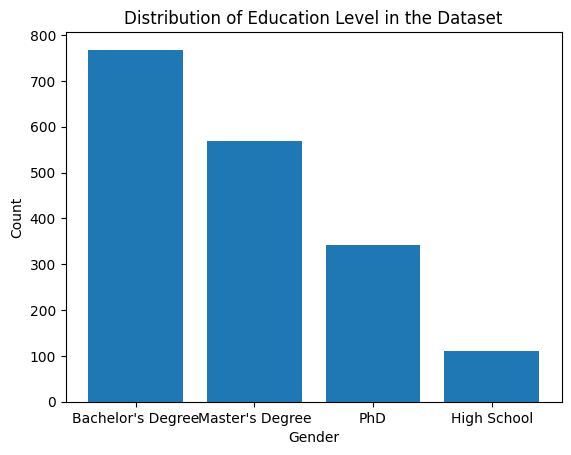

In [12]:
# bar graph for education level of all people in the set

plt.bar(df["Education Level"].value_counts().index, df["Education Level"].value_counts())
# Set labels for the x and y axes, and provide a title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Education Level in the Dataset')

plt.show()

In [13]:
df.loc[rk.index, "Education Level"].value_counts()

Master's Degree      357
PhD                  301
Bachelor's Degree    222
High School            5
Name: Education Level, dtype: int64

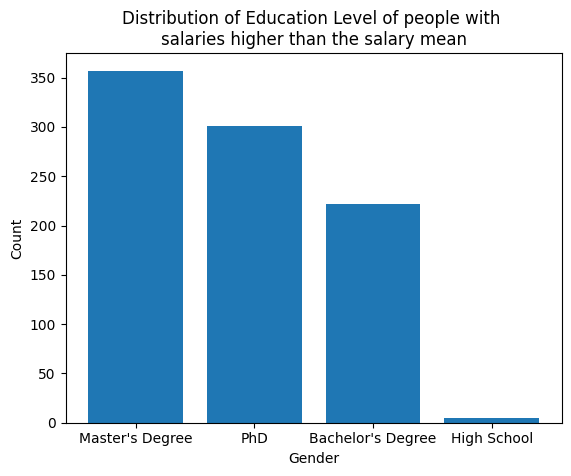

In [14]:
# Bar graph data of people who's salary exceed the salary mean

plt.bar(df.loc[rk.index, "Education Level"].value_counts().index, df.loc[rk.index, "Education Level"].value_counts())
# Set labels for the x and y axes, and provide a title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Education Level of people with \nsalaries higher than the salary mean')

plt.show()

In [15]:
# Get the total people on each education level in a text information

for i in ["Master's Degree","PhD","Bachelor's Degree"]:
  s = df.loc[rk.index, "Education Level"].value_counts().get(i,0)
  print(f"Total people with {i}: ", s)

Total people with Master's Degree:  357
Total people with PhD:  301
Total people with Bachelor's Degree:  222


In [16]:
wa = df.loc[rk.index, "Job Title"].value_counts().get("Software Engineer",0)
wa

37

In [17]:
meow = [*set(df["Job Title"])]
print(meow)
print(len(meow))

['Copywriter', 'Financial Manager', 'Junior Data Scientist', 'Junior Operations Coordinator', 'Graphic Designer', 'Junior Sales Associate', 'Sales Executive', 'Senior Marketing Coordinator', 'Director of Human Capital', 'Senior Financial Manager', 'Juniour HR Coordinator', 'Junior Financial Analyst', 'Sales Associate', 'Senior UX Designer', 'Senior Data Analyst', 'Senior Operations Coordinator', 'Operations Manager', 'Recruiter', 'Senior Project Engineer', 'Junior Business Analyst', 'Customer Service Rep', 'Senior Scientist', 'CEO', 'Senior Account Manager', 'Senior Marketing Specialist', 'Senior IT Project Manager', 'Back end Developer', 'Front end Developer', 'Strategy Consultant', 'Senior Software Architect', 'Social Media Man', 'Operations Director', 'Junior Product Manager', 'Senior Product Marketing Manager', 'Senior Business Development Manager', 'Data Entry Clerk', 'Marketing Director', 'Data Scientist', 'Customer Service Manager', 'Help Desk Analyst', 'Digital Content Producer

In [18]:
# Get the highest JOB paying and its count in the sets of salarys higher than the mean salary

what = {}
for i in meow:
  what[i] = df.loc[rk.index, "Job Title"].value_counts().get(i,0)
print(f"{max(what, key=what.get)} got the most job pay with salaries higher than the mean salary with {max(what.values())} count")

Software Engineer Manager got the most job pay with salaries higher than the mean salary with 120 count


In [19]:
# Get the average Age of people with salary higher than the mean salary

age = df.loc[rk.index, "Age"].mean()
print(f"Average Age of people with salary higher than the mean salary is {int(age)}")

Average Age of people with salary higher than the mean salary is 40


In [20]:
# get the average years of experience with people salary higher than the mean salary

exp = df.loc[rk.index, "Years of Experience"].mean()
print(f"Average years of experience of people with salary higher than the mean salary is {int(exp)} years")

Average years of experience of people with salary higher than the mean salary is 14 years


<Axes: xlabel='Years of Experience', ylabel='Salary'>

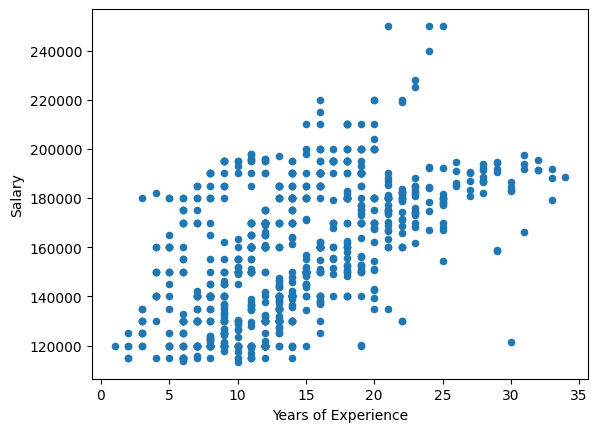

In [21]:
# linear plot of years of experience and salary on people with salaries higher than the mean salary

df.loc[rk.index].plot.scatter(x="Years of Experience",y="Salary" )

<Axes: xlabel='Years of Experience', ylabel='Salary'>

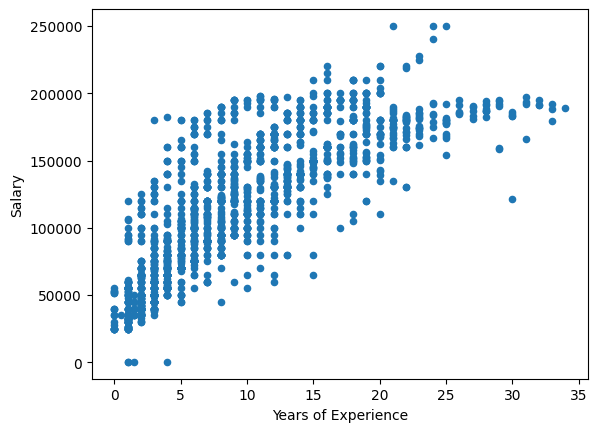

In [22]:
df.plot.scatter(x="Years of Experience",y="Salary" )

<Axes: xlabel='Years of Experience', ylabel='Salary'>

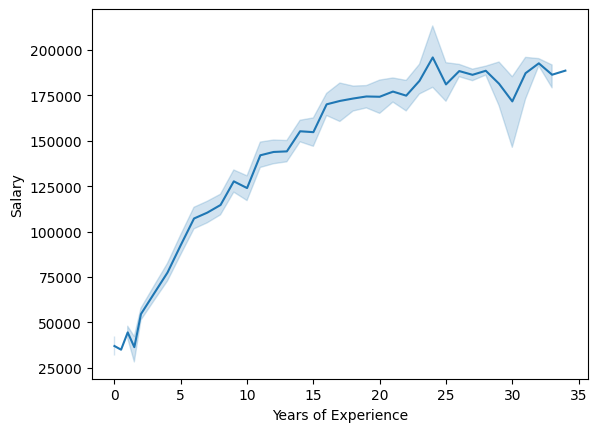

In [23]:
# lineplot of years of experience and salary on people with salaries higher than the mean salary

seaborn.lineplot(data = df, x = "Years of Experience",y = "Salary")

<Axes: xlabel='Years of Experience', ylabel='Salary'>

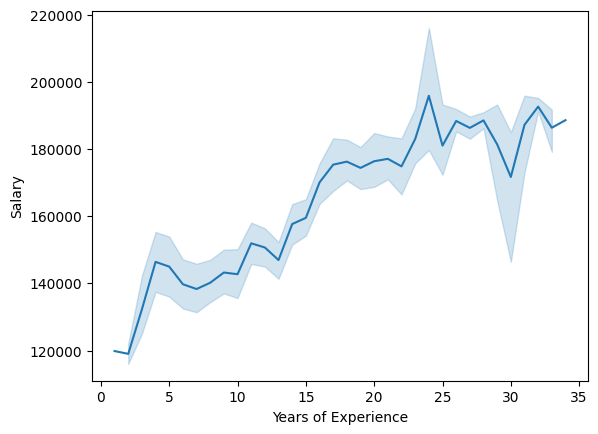

In [24]:
seaborn.lineplot(data =df.loc[rk.index], x = "Years of Experience",y = "Salary")

In [25]:
# gender info

counts = df["Gender"].value_counts()
counts

Male      966
Female    814
Other       7
Name: Gender, dtype: int64

In [26]:
# get gender info in the dataset in a more text informative

for i in ["Male", "Female", "Other"]:
  print(f"Total {i} on the dataset: ",  df["Gender"].value_counts().get(i))

Total Male on the dataset:  966
Total Female on the dataset:  814
Total Other on the dataset:  7


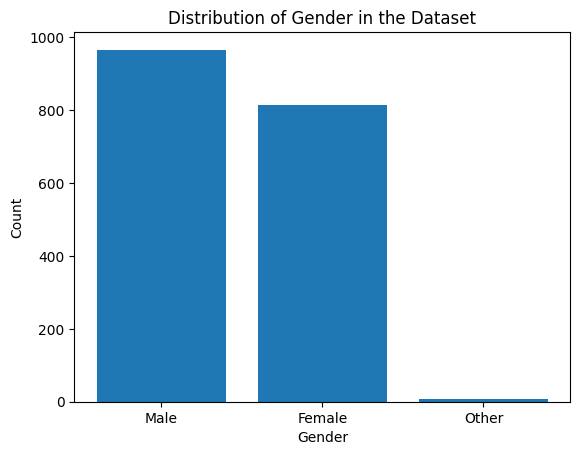

In [27]:
# bar graoh destribution of male and female in the dataset

plt.bar(counts.index, counts)
# Set labels for the x and y axes, and provide a title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in the Dataset')

plt.show()

In [28]:
# get gender info of people whose salary is higher than the mean salary

Scounts = df.loc[rk.index, "Gender"].value_counts()
for i in ["Male", "Female", "Other"]:
  print(f"Total {i}s with salaries higher than the mean salary: ", Scounts.get(i))

Total Males with salaries higher than the mean salary:  511
Total Females with salaries higher than the mean salary:  370
Total Others with salaries higher than the mean salary:  4


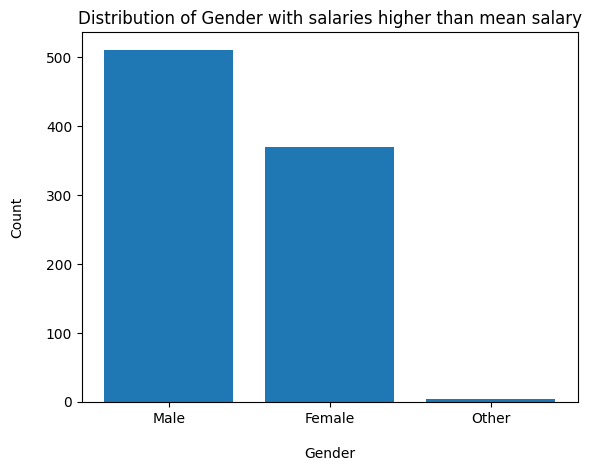

In [29]:
# Bar graph of gender info of people whose salary is higher than the mean salary

plt.bar(Scounts.index, Scounts)
# Set labels for the x and y axes, and provide a title for the plot
plt.xlabel('\nGender')
plt.ylabel('Count\n')
plt.title('Distribution of Gender with salaries higher than mean salary')

plt.show()